We will be using CNN. CNN use convolution layers. convolution layers are the building blocks of CNN. used in computer vision tasks like: image classification, image segmentation, object detection. these layers use kernels (filters) to scan an image and extract important features like texture size etc


In [ ]:
import matplotlib.pyplot as plt #for visualization
import tensorflow as tf #tf is a deep learning framework developed by google. it powers the whole model creation, evaluation, and training process
import pandas as pd # data analysis and manipulation
import numpy as np  # to handle numeric data

import warnings # supresses warnings, useful to keep the output clean especially in demo notebooks
warnings.filterwarnings('ignore')

from tensorflow import keras #keras is a high level API on tensorflow that simplifies model building
from keras import layers # to use basic layers. keras is  a high level api for the full ML workflow
from tensorflow.keras.models import Sequential # stacks layers in order
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense # activation applies functions like ReLU (which adds nonlinearity), dropout prevents overfitting by randomly disabling neurons during training, flatten converts a 2D dataset into 1D to prepare for the dense layer, dense is a fully connected layer for decision making
from tensorflow.keras.layers import Conv2D, MaxPooling2D #conv2d detects patterns in images, and MaxPooling2d reduces size of feature maps
from tensorflow.keras.utils import image_dataset_from_directory # to automatically load images from folders as a dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img #used for image augmentation (zoom, rotation, flip etc) during training
from tensorflow.keras.preprocessing import image_dataset_from_directory # this is repetition so we can delete this

import os
import matplotlib.image as mpimg #to read and display file imaging

In [ ]:
from zipfile import ZipFile #to extract data sets from a zip file, we have to import this

data_path = 'archive.zip' # name of the file

with ZipFile(data_path,'r') as zip: #opening the zipfile in r mode: r means read the file, it is a default setting so not really needed
    zip.extractall() # extract the data from the file
    print('The data set has been extracted.')

The data set has been extracted.


In [ ]:
import os
print("Contents of /content directory:")
for item in os.listdir('/content'):
    print(item)

Contents of /content directory:
.config
kagglecatsanddogs_3367a
archive.zip
.ipynb_checkpoints
kagglecatsanddogs_5340.zip
sample_data


In [ ]:
import os

# Check what's inside the kagglecatsanddogs_3367a directory
kaggle_dir = '/content/kagglecatsanddogs_3367a'
print("Contents of kagglecatsanddogs_3367a:")
for item in os.listdir(kaggle_dir):
    item_path = os.path.join(kaggle_dir, item)
    if os.path.isdir(item_path):
        file_count = len([f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))])
        print(f"📁 {item}/ ({file_count} files)")
    else:
        print(f"📄 {item}")

Contents of kagglecatsanddogs_3367a:
📁 PetImages/ (0 files)
📄 MSR-LA - 3467.docx
📄 readme[1].txt


In [ ]:
#Basically checking for the correct subdirectory (it can be different)
import os

# Check what's inside PetImages
petimages_dir = '/content/kagglecatsanddogs_3367a/PetImages'
print("Contents of PetImages:")
for item in os.listdir(petimages_dir):
    item_path = os.path.join(petimages_dir, item)
    if os.path.isdir(item_path):
        file_count = len([f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))])
        print(f"📁 {item}/ ({file_count} files)")
    else:
        print(f"📄 {item}")
        #showing the number of items in each file

Contents of PetImages:
📁 Cat/ (12491 files)
📁 Dog/ (12470 files)


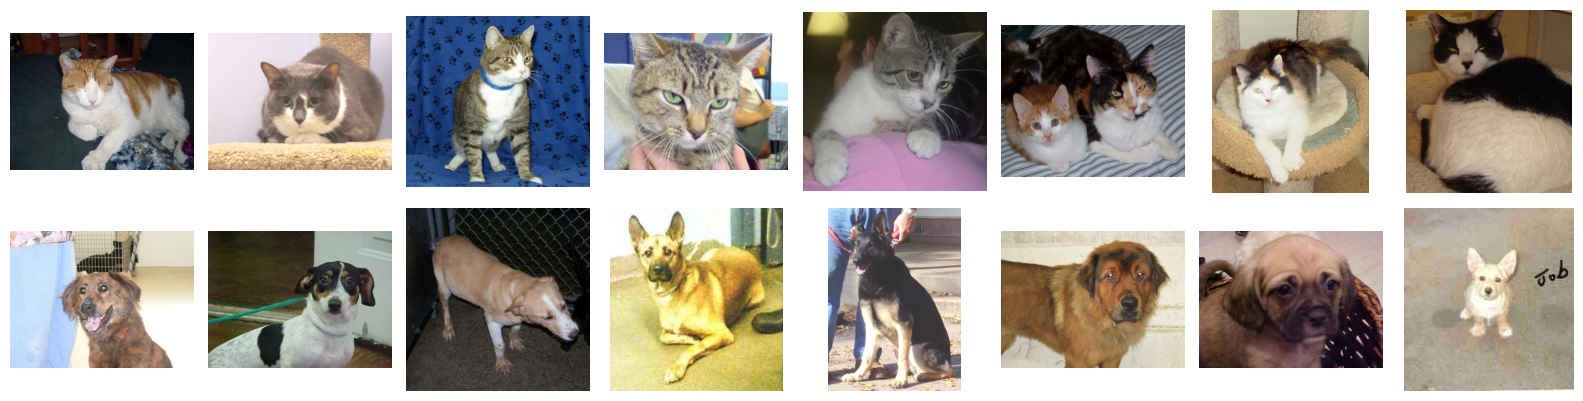

In [ ]:
import os #change after running
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set up the figure properly
plt.figure(figsize=(16, 16))  # create a new figure of desired size

cat_dir = os.path.join('/content/kagglecatsanddogs_3367a/PetImages/Cat')
dog_dir = os.path.join('/content/kagglecatsanddogs_3367a/PetImages/Dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(8, 8, i+1) # 4 in each block, can change the number
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.tight_layout()
plt.show()


In [ ]:
base_dir = '/content' # common setup for database. it sets the base directory where the image folders are located Points to the root directory (/content) where class subfolders exist.
# reads images from the folders, labels them automatically based on folder names
train_datagen = image_dataset_from_directory(base_dir, # Loads and processes images from folders, labels them based on folder names, and returns a tf.data.Dataset object.
# training dataset                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir, #
                                                  image_size=(200,200),
                                                  subset='validation', # validation helps detect overfitting
                                                  seed = 1, #shuffling the data
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 24959 files belonging to 2 classes.
Using 22464 files for training.
Found 24959 files belonging to 2 classes.
Using 2495 files for validation.


 the code below:

 takes a 200x200 color image (3 channels) and passes it through a series of filters (like a scanner) to learn features like:

Edges

Shapes

Patterns

And finally — make a yes/no decision (class 0 or 1)

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), # detect patterns in 2d
    layers.MaxPooling2D(2, 2), # reduces the size of the image to make is smaller and faster
    layers.Conv2D(64, (3, 3), activation='relu'), # repeats but with more filter (64 instead of the previous 32)
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
# repeating the same process 3 times to make it more and more accurate
    layers.Flatten(), # converts into 1d layer to prepare for the dense layer
    layers.Dense(512, activation='relu'), # fully connected layer with 512 neurons
    layers.BatchNormalization(), # helps the training go faster and more stable
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1), # randomly turns off some neurons to prevent overfitting
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), # start with 10% dropout then increase this to 20% because this is helpful as the model gets more deeper
    layers.BatchNormalization(), # repeat this a total of three times
    layers.Dense(1, activation='sigmoid') # just 1 output neuron because its binary classification
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

| Column Name      | What It Tells You                                                                                                                             |
| ---------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **Layer (type)** | The name and type of the layer (e.g., `Conv2D`, `Dense`, `Flatten`, etc.)                                                                     |
| **Output Shape** | The shape of the output tensor **after** this layer: `(batch_size, height, width, channels)` for Conv layers, `(batch_size, units)` for Dense |
| **Param #**      | The number of **trainable parameters** in that layer — weights + biases                                                                       |


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Remove known corrupted files
corrupted_files = [
    '/content/kagglecatsanddogs_3367a/PetImages/Cat/666.jpg',
    '/content/kagglecatsanddogs_3367a/PetImages/Dog/11702.jpg'
]

for file_path in corrupted_files:
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Removed: {file_path}")

# Create robust data generators
base_dir = '/content/kagglecatsanddogs_3367a/PetImages' # set up the main directory which will carry the two subfilds cats and dogs
# create the image generator, and 10% of the data will be used for validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)
# create and train validation loaders
train_datagen = datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200), # resize all images to 200x200 size
    batch_size=32, # feed 32 images at a time into the model
    class_mode='binary', # since its cat vs dog, use binary classification
    subset='training', # load the 90% training data
    shuffle=True # radomize the order of training images to prevent the model memorizing the training data
)
# exactly the same but 10% data for validation and we dont shuffle it
test_datagen = datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)
# compile the model
# Now compile and train your model
model.compile(
    loss='binary_crossentropy', # good for 2 option problems
    optimizer='adam', # helps the model update its weight smartly
    metrics=['accuracy']
)


history = model.fit(
    train_datagen,
    epochs=10, # repeat the training process 10 times
    steps_per_epoch=500,    # for it to work faster, would preferably use the entire dataset
    validation_data=test_datagen, # Use test images to check accuracy after each epoch
    validation_steps=20     # Only use 20 mini-batches for validation each epoch
# we use less data so its faster
)

Found 22464 images belonging to 2 classes.
Found 2495 images belonging to 2 classes.
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1152s 2s/step - accuracy: 0.6206 - loss: 0.6730 - val_accuracy: 0.2297 - val_loss: 1.2740
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 479s 955ms/step - accuracy: 0.7444 - loss: 0.5286 - val_accuracy: 0.4109 - val_loss: 1.1099
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1221s 2s/step - accuracy: 0.7527 - loss: 0.5131 - val_accuracy: 0.9125 - val_loss: 0.2377
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 502s 1s/step - accuracy: 0.7934 - loss: 0.4487 - val_accuracy: 0.1328 - val_loss: 1.4211
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1134s 2s/step - accuracy: 0.8117 - loss: 0.4184 - val_accuracy: 0.5203 - val_loss: 0.9369
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 502s 1s/step - accuracy: 0.8333 - loss: 0.3911 - val_accuracy: 0.7312 - val_loss: 0.5021
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1162s 2s/step - accuracy: 0.8344 - loss: 0.3711 - val_accuracy: 0.9984 - val_loss: 0.0225
Epoch

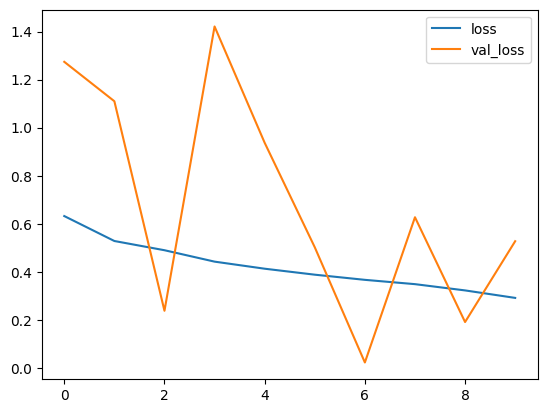

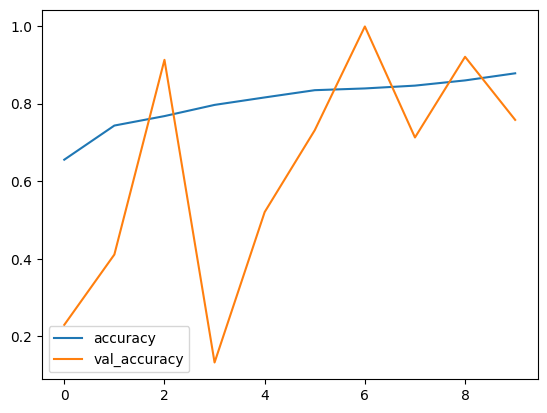

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

Testing with actual files:
Cat files: ['5037.jpg', '2330.jpg', '6318.jpg']
Dog files: ['5037.jpg', '2330.jpg', '6318.jpg']
Loading image from: /content/kagglecatsanddogs_3367a/PetImages/Cat/5037.jpg


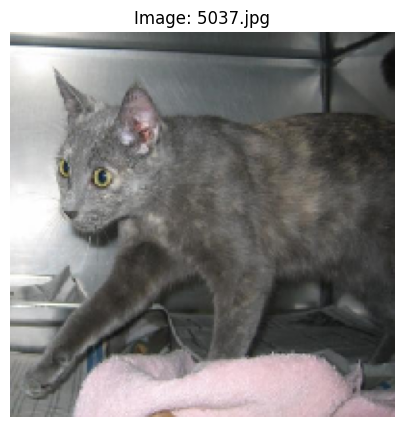

Image shape: (1, 200, 200, 3)
Prediction: Cat
Confidence: 0.0981
Raw output: [[0.09807013]]
--------------------------------------------------
Loading image from: /content/kagglecatsanddogs_3367a/PetImages/Cat/2330.jpg


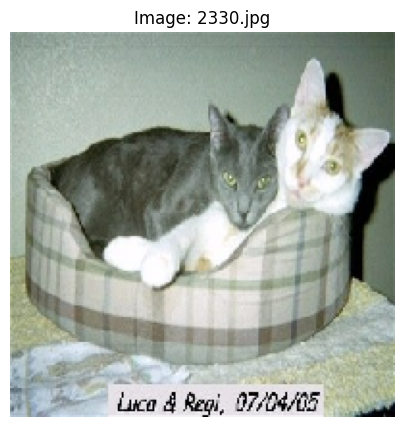

Image shape: (1, 200, 200, 3)
Prediction: Dog
Confidence: 0.5162
Raw output: [[0.5161841]]
--------------------------------------------------
Loading image from: /content/kagglecatsanddogs_3367a/PetImages/Cat/6318.jpg


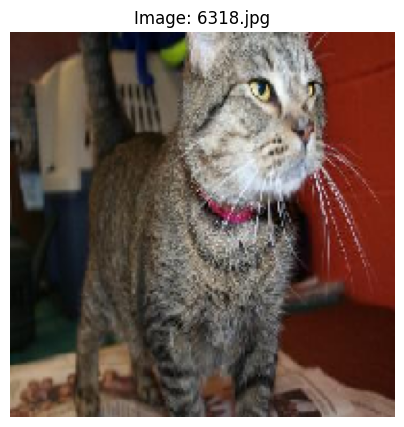

Image shape: (1, 200, 200, 3)
Prediction: Cat
Confidence: 0.2185
Raw output: [[0.21848145]]
--------------------------------------------------
Loading image from: /content/kagglecatsanddogs_3367a/PetImages/Dog/5037.jpg


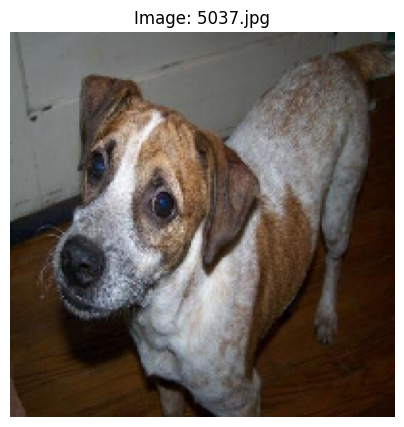

Image shape: (1, 200, 200, 3)
Prediction: Dog
Confidence: 0.9575
Raw output: [[0.9575254]]
--------------------------------------------------
Loading image from: /content/kagglecatsanddogs_3367a/PetImages/Dog/2330.jpg


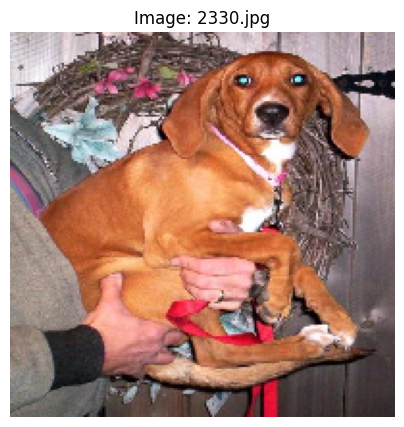

Image shape: (1, 200, 200, 3)
Prediction: Dog
Confidence: 0.9998
Raw output: [[0.9997948]]
--------------------------------------------------
Loading image from: /content/kagglecatsanddogs_3367a/PetImages/Dog/6318.jpg


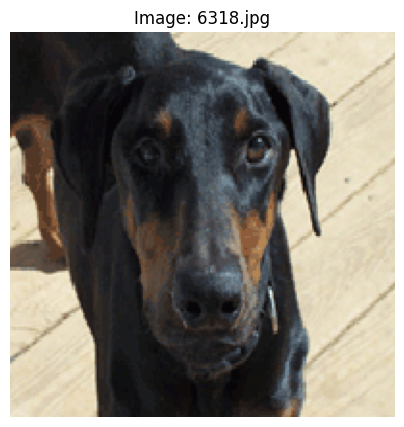

Image shape: (1, 200, 200, 3)
Prediction: Dog
Confidence: 0.9867
Raw output: [[0.9867304]]
--------------------------------------------------


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_image(image_path):
    # Check if file exists
    if not os.path.exists(image_path):
        print(f"Error: File '{image_path}' does not exist!")
        return

    print(f"Loading image from: {image_path}")

    try:
        # Load and display image
        img = image.load_img(image_path, target_size=(200, 200))
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image: {os.path.basename(image_path)}")
        plt.show()

        # Preprocess image
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=0)

        print(f"Image shape: {img_array.shape}")

        # Make prediction
        result = model.predict(img_array, verbose=0)
        confidence = result[0][0]

        prediction = "Dog" if confidence >= 0.5 else "Cat"
        print(f"Prediction: {prediction}")
        print(f"Confidence: {confidence:.4f}")
        print(f"Raw output: {result}")
        print("-" * 50)

    except Exception as e:
        print(f"Error processing image: {e}")

# First, let's find some actual image files
cat_dir = '/content/kagglecatsanddogs_3367a/PetImages/Cat'
dog_dir = '/content/kagglecatsanddogs_3367a/PetImages/Dog'

# Get first few files from each directory
cat_files = [f for f in os.listdir(cat_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:3]
dog_files = [f for f in os.listdir(dog_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:3]

print("Testing with actual files:")
print(f"Cat files: {cat_files}")
print(f"Dog files: {dog_files}")

# Test with actual existing files
for cat_file in cat_files:
    predict_image(os.path.join(cat_dir, cat_file))

for dog_file in dog_files:
    predict_image(os.path.join(dog_dir, dog_file))

In [ ]:
from google.colab import files
files.upload()
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(200, 200))  # match model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 200, 200, 3)
    img_array /= 255.0  # normalize like training data

    prediction = model.predict(img_array)[0][0]

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediction: Cat" if prediction < 0.5 else "Prediction: Dog")
    plt.show()

    # Print probability
    print(f"Raw model output: {prediction:.4f}")
    print("Predicted class:", "Cat" if prediction < 0.5 else "Dog")


Saving michael-sum-LEpfefQf4rU-unsplash.jpg to michael-sum-LEpfefQf4rU-unsplash.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


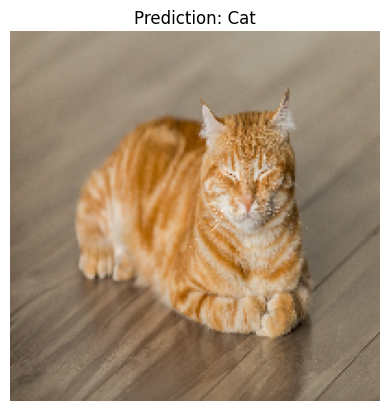

Raw model output: 0.1377
Predicted class: Cat


In [ ]:
predict_image('/content/cat.jpg')


In [ ]:
from google.colab import files
files.upload()
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(200, 200))  # match model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 200, 200, 3)
    img_array /= 255.0  # normalize like training data

    prediction = model.predict(img_array)[0][0]

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediction: Cat" if prediction < 0.5 else "Prediction: Dog")
    plt.show()

    # Print probability
    print(f"Raw model output: {prediction:.4f}")
    print("Predicted class:", "Cat" if prediction < 0.5 else "Dog")


Saving dog.jpg to dog.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


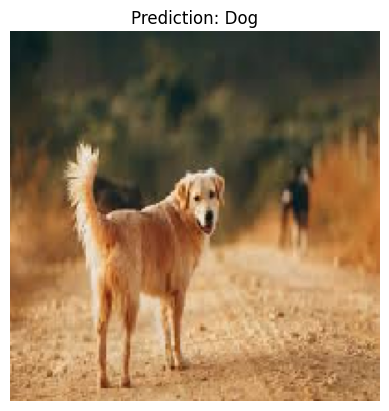

Raw model output: 0.7318
Predicted class: Dog


In [ ]:
predict_image('/content/dog.jpg')